<!--######################################################################################################################################################################################################################################################################################################################################################
-->

(U4)=
# Unidad 4

## Transformada de Laplace

En este capítulo estudiaremos una herramienta muy útil para resolver EDO Lineales: La [**transformada integral**](https://en.wikipedia.org/wiki/Integral_transform) de Laplace, que mapea o transforma una función $f(t)$ en otra función $F(s)$ mediante una integración:

$$
T\left(f(t)\right)=\int_{t_1}^{t_2}K(s,t)f(t)~dt=F(s)
$$ 

donde $K$ es conocida como el **núcleo** o **kernel** de la transformación y $t_1,t_2$ son valores que dependen de la definición particular que se utilice, pudiendo ser $\pm\infty$.

La esencia de toda transformada integral es *transformar* un problema complicado -que involucre a $f(t)$- en uno nuevo para $F(s)$ que simplifique el original, para luego retornar a éste mediante una *transformada inversa* y resolverlo.

### Definición y Existencia

**Definición**: Si $f(t)$ es una función definida $\forall~t>0$, entonces se dice que la integral 

$$
\mathscr{L}\{f(t)\}=\int_0^\infty e^{-st}f(t)~dt=F(s)
$$ (Laplace)

es la **Transformada de Laplace** de $f(t)$, siempre que la integral impropia converja.

```{admonition} Ejercicio Teórico
Calcule la Transformada de Laplace de $f(t)=e^{at}$, donde $a\in\mathbb{R}$.
```

En Python:

In [1]:
import sympy as sp

# Definir la variable simbólica 't' (tiempo) y 's' (frecuencia en el dominio de Laplace), a constante
t, s, a= sp.symbols('t s a')

# Definir algunas funciones simbólicas en el tiempo
f1 = sp.exp(a*t)  # Función exponencial

# Calcular las transformadas de Laplace
laplace_f1 = sp.laplace_transform(f1, t, s)

# Mostrar los resultados
print(f"Transformada de Laplace de exp(at): {laplace_f1[0]}")

Transformada de Laplace de exp(at): 1/(-a + s)


**Propiedad**: La transformada de Laplace es lineal: 

$$
\mathscr{L}\{\alpha f(t)+\beta g(t)\}=\alpha\mathscr{L}\{f(t)\}+\beta\mathscr{L}\{g(t)\}
$$ 

para todo $\alpha,\beta\in\mathbb{R}$.

**Condiciones Suficientes para la Existencia de la Transformada de Laplace.** Las condiciones suficientes que garantizan la existencia de $\mathscr{L}\{f(t)\}$ son que:

1. $f(t)$ sea continua por tramos en $[0,\infty[~$.
2. $f(t)$ sea de orden exponencial $c$, para todo $t>T$.

```{figure} Laplace1.png
---
height: 150px
name: TEU
---
Continuidad por Tramos
```

```{figure} Laplace2.png
---
height: 150px
name: TEU
---
Orden Exponencial
```
Que $f(t)$ sea de orden exponencial $c$ significa que existen constantes $c,M>0$ tales que 

$$
|f(t)|\leq Me^{ct}
$$ 

es decir, $f(t)$ no crece más rápido que $e^{ct}$.

**Teorema}**: Si $f(t)$ es continua por tramos en $[0,\infty[$ y de orden exponencial $c$ entonces $\mathscr{L}\{f(t)\}$ existe para $s>c$.

**Teorema**: Si $f(t)$ es continua por tramos en $[0,\infty[$ y de orden exponencial $c$, con $\mathscr{L}\{f(t)\}=F(s)$ entonces 

$$
\lim_{s\to\infty}F(s)=0.
$$ 

```{admonition} Ejercicio Teórico
Justifique que $\mathscr{L}\{\frac{1}{t}\}$, $\mathscr{L}\{e^{t^2}\}$ no existen.
```

```{admonition} Ejercicio Teórico
¿Existe una $f(t)$ continua por tramos en $[0,\infty[$ y de orden exponencial $c$ tal que $\mathscr{L}\{f(t)\}=s^2$?
```

### Transformadas Básicas

1. $\mathscr{L}\{1\}=\frac{1}{s}$.
2. $\mathscr{L}\{t\}=\frac{1}{s^2}$.
3. $\mathscr{L}\{t^n\}=\frac{n!}{s^{n+1}}$, $n\in\mathbb{N}_0$.
4. $\mathscr{L}\{e^{at}\}=\frac{1}{s-a}$, $s>a$.
5. $\mathscr{L}\{\sin(kt)\}=\frac{k}{s^2+k^2}$.
6. $\mathscr{L}\{\cos(kt)\}=\frac{s}{s^2+k^2}$.

```{admonition} Ejercicio Teórico
Calcule $\mathscr{L}\{\cos^2(t)\}$.
```

## Transformadas Inversas y Transformadas de Derivadas

### Transformada Inversa

**Definición**: Si $\mathscr{L}\{f(t)\}=F(s)$ entonces 

$$
\mathscr{L}^{-1}\{F(s)\}=f(t)
$$

se denomina la **Transformada Inversa de Laplace** de $F(s)$.

**Propiedad}**: La transformada inversa de Laplace es lineal: 

$$
\mathscr{L}^{-1}\{\alpha F(s)+\beta G(s)\}=\alpha\mathscr{L}^{-1}\{F(s)\}+\beta\mathscr{L}^{-1}\{G(s)\}
$$ 

para todo $\alpha,\beta\in\mathbb{R}$.

```{admonition} Ejercicio Teórico
Calcule
1. $\mathscr{L}^{-1}\left\{\frac{1}{s^8}\right\}$.
2. $\mathscr{L}^{-1}\left\{\frac{1}{s^2+8}\right\}$.
3. $\mathscr{L}^{-1}\left\{\frac{s}{(s^2+4)(s+2)}\right\}$.
```

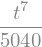

In [2]:
from sympy import *
from sympy.printing.latex import LatexPrinter

class MyLatexPrinter(LatexPrinter):
    def _print_Heaviside(self, expr, exp=None):
        pargs = ', '.join(self._print(arg) for arg in expr.pargs)
        tex = r"u\left(%s\right)" % pargs
        if exp:
            tex = r"\left(%s\right)^{%s}" % (tex, exp)
        return tex

def my_latex(expr, **settings):
    return MyLatexPrinter(settings).doprint(expr)

init_printing(latex_printer=my_latex)

var("s, t",positive=True)
expr = 1 / s**8
inv_lap = inverse_laplace_transform(expr, s, t)
display(inv_lap)

### Transformada de una Derivada

Para utilizar la Transformada de Laplace con el fin de resolver una ecuación diferencial, debemos preguntarnos: ¿Es posible calcular la transformada de Laplace de $f'(t)$?

**Teorema**: Si $f(t), f'(t),\ldots,f^{(n-1)}(t)$ son continuas en $[0,\infty[$, $f^{(n)}(t)$ es continua por tramos y $f(t)$ de orden exponencial en $[0,\infty[$ entonces 

$$
\mathscr{L}\{f^{(n)}(t)\}=s^nF(s)-s^{n-1}f(0)-s^{n-2}f'(0)-\cdots-f^{(n-1)}(0)
$$

donde $F(s)=\mathscr{L}\{f(t)\}$.

```{admonition} Ejercicio Teórico
Resuelva 

$$
y''+y=\sqrt{2}\sin(\sqrt{2}t)~,~y(0)=y'(0)=0.
$$
```

Gráfico de la solución en Python:

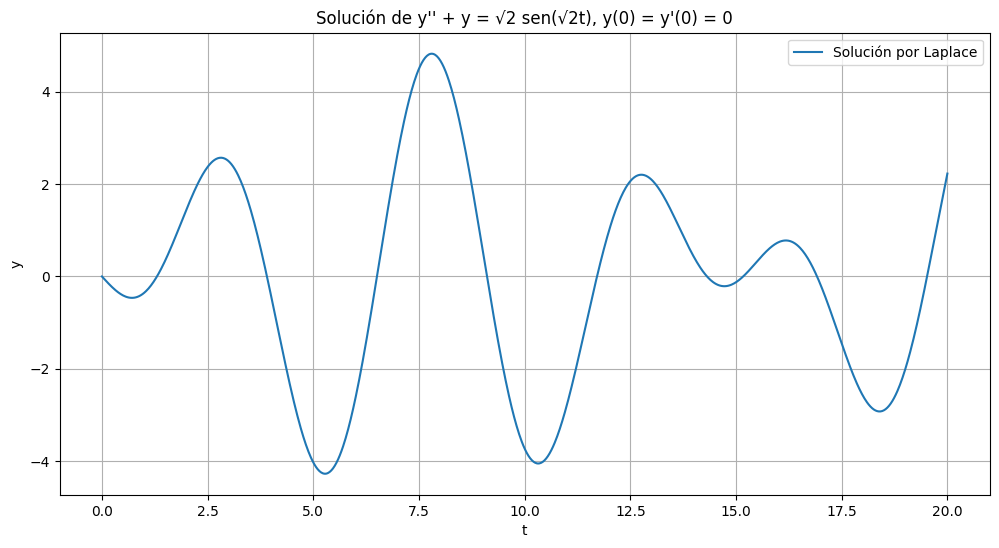

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def laplace_solution(t):
    return np.sqrt(2) * (np.sin(t) - np.sin(np.sqrt(2)*t)) / (2 - np.sqrt(2))

# Generar puntos para graficar
t = np.linspace(0, 20, 1000)

# Calcular solución
y_laplace = laplace_solution(t)

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(t, y_laplace, label='Solución por Laplace')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Solución de y'' + y = √2 sen(√2t), y(0) = y'(0) = 0")
plt.legend()
plt.grid(True)
plt.show()

Solución explícita en Python (mediante la Transformada de Laplace):

In [4]:
import sympy as sp

# Definir las variables simbólicas (t como positiva)
s = sp.symbols('s')
t = sp.symbols('t', positive=True)
Y = sp.Function('Y')(s)

# Definir la transformada de Laplace de y''
L_y_double_prime = s**2 * Y - s * sp.sympify(0) - sp.sympify(0)

# Definir la transformada de Laplace de y
L_y = Y

# Definir la transformada de Laplace de √2*sin(√2*t)
L_f = sp.sqrt(2) * (sp.sqrt(2) / (s**2 + 2))

# Formar la ecuación en el dominio de Laplace
laplace_eq = L_y_double_prime + L_y - L_f

# Resolver para Y
Y_solved = sp.solve(laplace_eq, Y)[0]

# Aplicar la transformada inversa de Laplace
y = sp.inverse_laplace_transform(Y_solved, s, t)

# Simplificar la solución
y_simplified = sp.simplify(y)

print("La solución explícita es:")
sp.pprint(y_simplified)

La solución explícita es:
2⋅sin(t) - √2⋅sin(√2⋅t)


```{admonition} Ejercicio Teórico (Propuesto)
Calcule $\mathscr{L}\{te^t\}$.
```

## Propiedades Operacionales I

###  Traslación en el Eje $s$

¿Cuál es el efecto que produce la función $e^{at}$ sobre una función $f(t)$ al aplicar la Transformada de Laplace?

**Primer Teorema de Traslación**:  Si $\mathscr{L}\{f(t)\}=F(s)$ y $a\in\mathbb{R}$ entonces 

$$
\mathscr{L}\{e^{at}f(t)\}=F(s-a)
$$ 

```{figure} Laplace3.png
---
height: 150px
name: TEU
---
Traslación en el eje $s$
```

**Notación**: Usualmente escribimos 

$$
\mathscr{L}\{e^{at}f(t)\}=\mathscr{L}\{f(t)\}\Big|_{s\mapsto s-a}
$$

```{admonition} Ejercicio Teórico
Calcule $\mathscr{L}\{e^{2t}\sin(7t)\}$.
```

**Forma Inversa**: $\mathscr{L}^{-1}\{F(s-a)\}=\mathscr{L}^{-1}\{F(s)\}_{s\mapsto s-a}=e^{at}f(t)$, donde $f(t)=\mathscr{L}^{-1}\{F(s)\}$.

```{admonition} Ejercicio Teórico
Resuelva el PVI: 

$$
y''-2y'+5y=1+t~~,~~y(0)=0~,~y'(0)=4.
$$
```

### Función Escalón Unitario

**Definición**: Se define la **Función Escalón Unitario** $\mathscr{U}(t-a)$ como 

$$
\mathscr{U}(t-a)=\left\{\begin{array}{ccc}0&\text{si}&0\leq t<a\\ 1&\text{si}& t\geq a\end{array}\right.
$$

```{figure} Laplace4.png
---
height: 150px
name: TEU
---
Función Escalón Unitario
```

Toda función por tramos se puede escribir en términos de la función escalón unitario. Por ejemplo, 

$$
f(t)=\left\{\begin{array}{ccc}g(t)&\text{si}&t<a\\ h(t)&\text{si}& t\geq a\end{array}\right.
$$ 

puede escribirse como 

$$
f(t)=g(t)\big(1-\mathscr{U}(t-a)\big)+h(t)\mathscr{U}(t-a).
$$

```{admonition} Ejercicio Teórico
 Escriba la función dada en términos del escalón unitario 
 
 $$
 f(t)=\left\{\begin{array}{ccc}g(t)&\text{si}&t<a\\ h(t)&\text{si}& a\leq t<b\\ k(t)&\text{si}&t\geq b\end{array}\right.
 $$
```

El efecto que tiene la función $\mathscr{U}(t-a)$ sobre una función cualquiera $f(t)$, donde $t\geq 0$, es 

$$
f(t-a)\mathscr{U}(t-a)=\left\{\begin{array}{ccc}0&\text{si}&0\leq t<a\\ f(t-a)&\text{si}& t\geq a\end{array}\right.
$$ 

```{figure} Laplace5.png
---
height: 150px
name: TEU
---
Desplazamiento en el eje $t$
```

```{admonition} Ejercicio Teórico
Pruebe que

1. $\mathscr{L}\left\{\mathscr{U}(t-a)\right\}=\dfrac{e^{-as}}{s}$.
2. $\mathscr{L}\left\{f(t-a)\mathscr{U}(t-a)\right\}=e^{-as}F(s)$, donde $F(s)=\mathscr{L}\{f(t)\}$.
```

## Propiedades Operacionales II

### Derivadas de Transformadas

Suponga que $F(s)=\mathscr{L}\{f(t)\}$ existe y que es posible intercambiar el orden de la derivada y la integral. Así 

$$
\frac{d}{ds}F(s)=-\mathscr{L}\{tf(t)\}~~\Rightarrow~~\mathscr{L}\{tf(t)\}=-\frac{d}{ds}F(s).
$$ 

Luego 

$$
\mathscr{L}\{t^2f(t)\}=\frac{d^2}{ds^2}F(s).
$$

**Teorema**: Si $F(s)=\mathscr{L}\{f(t)\}$ y $n\in\mathbb{N}$ entonces 

$$
\mathscr{L}\{t^nf(t)\}=(-1)^n\frac{d^n}{ds^n}F(s)
$$

```{admonition} Ejercicio Teórico
Calcule $\mathscr{L}\{t\cos(kt)\}$ y $\mathscr{L}\{t^2e^{4t}\}$.
```

```{admonition} Ejercicio Teórico
Calcule $\mathscr{L}^{-1}\left\{\arctan\left(\dfrac{3}{s+2}\right)\right\}$.
```

### Convolución

Si $f$ y $g$ son funciones continuas por tramos en $[0,\infty[$ entonces la **convolución** $\ast$ de $f$ con $g$ se define como 

$$
f\ast g=\int_0^tf(\tau)g(t-\tau)~d\tau
$$

¿Qué se trata de expresar mediante la convolución? Podemos interpretar $f\ast g$ como una medida de la superposición o interacción entre $f$ y una versión trasladada e invertida de $g$. Una visualización de la convolución está disponible en [Youtube](https://www.youtube.com/watch?v=IOXzLMqcLbg&ab_channel=SignalSense) donde se muestra como un filtro de señales o una versión discreta en el canal [3B1B](https://www.youtube.com/watch?v=KuXjwB4LzSA&ab_channel=3Blue1Brown) donde se ejemplifica como filtro de imágenes.


```{admonition} Ejercicio Teórico
Calcule $e^t\ast t^2$.
```

Solución explícita en Python:

In [5]:
import sympy as sp

# Definir la variable simbólica
t, tau = sp.symbols('t tau')

# Definir las funciones f(tau) y g(t - tau)
f_tau = sp.exp(tau)  # f(tau) = exp(tau) para tau >= 0
g_t_tau = (t - tau)**2 # g(t - tau) = (t - tau)**2 para t - tau >= 0

# Definir la convolución explícita
convolucion_integral = sp.integrate(f_tau * g_t_tau, (tau, 0, t))

# Simplificar la expresión resultante
convolucion = sp.simplify(convolucion_integral)

# Mostrar la solución explícita de la convolución
print("La convolución es:")
sp.pprint(convolucion)

La convolución es:
   2            t    
- t  - 2⋅t + 2⋅ℯ  - 2


**Propiedad**: La convolución es conmutativa: $f\ast g=g\ast f$. 

**Teorema**: Si $f(t)$ y $g(t)$ son funciones continuas por tramos en $[0,\infty[$ y de orden exponencial, entonces 

$$
\mathscr{L}\{f\ast g\}=\mathscr{L}\{f(t)\}\cdot\mathscr{L}\{f(t)\}=F(s)\cdot G(s)
$$

```{admonition} Ejercicio Teórico
Determine $\displaystyle\mathscr{L}\left\{\int_0^te^\tau(t-\tau)^2~d\tau\right\}.$
```

### Transformada de una Integral

Usando el teorema de la transformada de Laplace de una convolución con $g(t)=1$, obtenemos que 

$$
\mathscr{L}\left\{\int_0^tf(\tau)~d\tau\right\}=\frac{F(s)}{s}
$$

```{admonition} Ejercicio Teórico
Resolver la ecuación integro-diferencial 

$$
y'(t)=1-\sin(t)-\int_0^ty(\tau)~d\tau~~,~~y(0)=0
$$
```

## Función Delta de Dirac

Consideremos la función 

$$
\delta_a(t-t_0)=\left\{\begin{array}{ccc}
     0 & \text{si} & 0\leq t <t_0-a\\
    \frac{1}{2a} & \text{si} & t_0-a< t <t_0+a\\ 
     0 & \text{si} & t\geq t_0-a\\
\end{array}\right.
$$ 

que se conoce como **función impulso unitario**. 

```{figure} Dirac1.png
---
height: 100px
name: Dirac1
---
Función Impulso Unitario
```

**Propiedad**:

$$
\int_0^\infty\delta_a(t-t_0)~dt=1
$$

**Definición**: La **función delta $\delta$ de Dirac** se define como

$$
\delta(t-t_0)=\lim_{a\to0}\delta_a(t-t_0)
$$

```{figure} Dirac1.png
---
height: 100px
name: Dirac2
---
Función Delta de Dirac
```

La función delta de Dirac tiene las siguientes propiedades:

1. $$
\delta(t-t_0)=\left\{\begin{array}{ccc}
    \infty & \text{si} & t=t_0\\
    0 & \text{si} & t\neq t_0 
\end{array}\right.
$$

3. $$
\int_0^\infty\delta(t-t_0)~dt=1
$$

**Teorema**. Si $\mathscr{L}\{\delta(t-t_0)\}=\displaystyle\lim_{a\to0}\mathscr{L}\{\delta_a(t-t_0)\}$ y $t_0>0$ entonces 

$$
\mathscr{L}\{\delta(t-t_0)\}=e^{-st_0}
$$

En particular, si $t_0=0$ entonces 

$$
\mathscr{L}\{\delta(t)\}=1.
$$

```{admonition} Ejercicio Aplicado
Una masa de $1$ $kg.$, sujeta a un resorte de constante $k=1$, se suelta desde el reposo a $1$ $m.$ por debajo de la posición de equilibrio del sistema masa-resorte. Después de $\frac{\pi}{2}~seg.$, la masa es golpeada hacia abajo con un martillo que ejerce un impulso de magnitud $3$ sobre la masa.

1. Determine la EDO que modela esta situación y resuélvala.
2. ¿Qué le sucede a la masa después de ser golpeada? Interprete gráficamente.
```

En Python:

La solución simbólica es:
(Heaviside(t) - 3*Heaviside(t - pi/2))*cos(t)


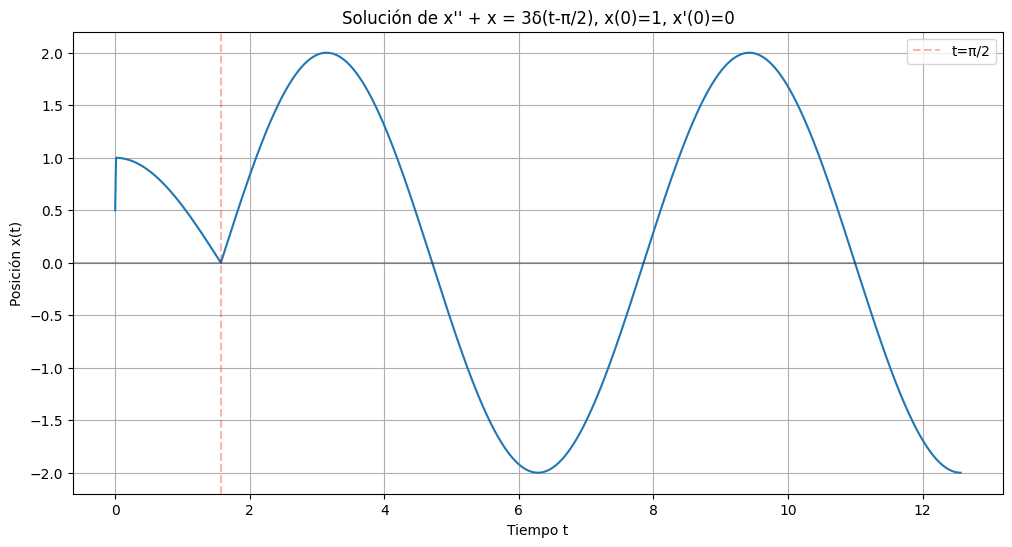

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import t, s

# Definir variables simbólicas
t = sp.Symbol('t', real=True)
s = sp.Symbol('s')

# Definir las condiciones iniciales
x0 = 1  # x(0)
v0 = 0  # x'(0)

# La transformada de Laplace de la delta de Dirac desplazada δ(t-a) es e^(-as)
a = sp.pi/2  # El desplazamiento de la delta
L_delta = sp.exp(-a*s)  # Transformada de la delta desplazada

# Aplicar la transformada de Laplace a la ecuación. Este cálculo es manual
# L{x''} + L{x} = 3L{δ(t-π/2)}
# s²X(s) - sx(0) - x'(0) + X(s) = 3e^(-πs/2)
# (s² + 1)X(s) = sx₀ + v₀ + 3e^(-πs/2)
# X(s) = (sx₀ + v₀ + 3e^(-πs/2))/(s² + 1)

X_s = (s*x0 + v0 + 3*L_delta)/(s**2 + 1)

# Calcular la transformada inversa
x_t = sp.inverse_laplace_transform(X_s, s, t)

# Simplificar la expresión
x_t = sp.simplify(x_t)

# Convertir la solución simbólica a una función numérica para graficar
x_t_lambda = sp.lambdify(t, x_t, modules=['numpy'])

# Crear puntos para graficar
t_vals = np.linspace(0, 4*np.pi, 1000)
x_vals = x_t_lambda(t_vals)

# Graficar la solución
plt.figure(figsize=(12, 6))
plt.plot(t_vals, x_vals)
plt.grid(True)
plt.xlabel('Tiempo t')
plt.ylabel('Posición x(t)')
plt.title('Solución de x\'\' + x = 3δ(t-π/2), x(0)=1, x\'(0)=0')
plt.axvline(x=np.pi/2, color='r', linestyle='--', alpha=0.3, label='t=π/2')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.legend()

# Imprimir la solución simbólica
print("La solución simbólica es:")
print(x_t)
plt.show()